In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from pathlib import Path

In [8]:
# Set the path to the folder containing the 'train' and 'val' folders
train_dir = Path('./train')
val_dir = Path('./val')

In [9]:
#Function for loading Images
def load_images(folder_path, img_size=(32, 32), batch_size=32):
    # Set the image size
    img_size_val = (32, 32)
    # Create empty lists for the images and labels
    images_val = []
    labels_val = []
    # Loop over each folder from '0' to '9'
    for label in range(10):
        data_dir = os.path.join(folder_path, str(label))
        # Loop over each image in the folder
        for file in os.listdir(data_dir):
            file_dir = os.path.join(data_dir, file)
            if file_dir.endswith(('.tiff','.bmp')):
                # Load the image and resize it to the desired size
                img = cv2.imread(file_dir, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, img_size_val)
                # Append the image and label to the lists
                images_val.append(img)
                labels_val.append(label)
    # Convert the lists to NumPy arrays
    images_val = np.array(images_val)
    labels_val = np.array(labels_val)
    return images_val, labels_val


# Load the train and validation images and labels
X_train, y_train = load_images(train_dir)
X_val, y_val = load_images(val_dir)

In [10]:
#Printing the size and shape of dataset
print(len(X_train))
print(len(X_val))
print(X_train.shape)
print(X_val.shape)

1000
178
(1000, 32, 32)
(178, 32, 32)


In [11]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([ keras.layers.Flatten(),keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')])
# compile the nn
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# train the model
# 10 iterations done here
model.fit(X_train, y_train,epochs= 10,validation_data=(X_val, y_val))

Epoch 1/10
32/32 [==============================] - 1s 10ms/step - loss: 148.9429 - accuracy: 0.3900 - val_loss: 78.1061 - val_accuracy: 0.5449
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 33.8671 - accuracy: 0.7680 - val_loss: 29.1312 - val_accuracy: 0.7640
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 15.5824 - accuracy: 0.8640 - val_loss: 17.6374 - val_accuracy: 0.8708
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7902 - accuracy: 0.9110 - val_loss: 25.1138 - val_accuracy: 0.8146
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 7.0980 - accuracy: 0.9120 - val_loss: 18.3067 - val_accuracy: 0.8708
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 4.4158 - accuracy: 0.9430 - val_loss: 19.5033 - val_accuracy: 0.8876
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 2.7088 - accuracy: 0.9560 - val_loss: 26.2637 - val_accuracy: 0.8483
Epoch 8/

In [12]:
# now scale and try to check the accuracy, divide dataset by 255
x_train_scaled = X_train/255
x_test_scaled = X_val/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_val))

Epoch 1/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.9580 - val_loss: 0.9124 - val_accuracy: 0.8708
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.9520 - val_loss: 0.8953 - val_accuracy: 0.8876
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.9690 - val_loss: 0.8824 - val_accuracy: 0.9157
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.9760 - val_loss: 0.8736 - val_accuracy: 0.9213
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.9830 - val_loss: 0.8657 - val_accuracy: 0.9213
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.9870 - val_loss: 0.8602 - val_accuracy: 0.9213
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.9890 - val_loss: 0.8552 - val_accuracy: 0.9157
Epoch 8/10
32/32 [==

In [13]:
# evaluate test dataset
model.evaluate(x_test_scaled,y_val)

6/6 [==============================] - 0s 1ms/step - loss: 0.8412 - accuracy: 0.9157


[0.8412293195724487, 0.915730357170105]

Predicted Value is  0
Predicted Value is  4


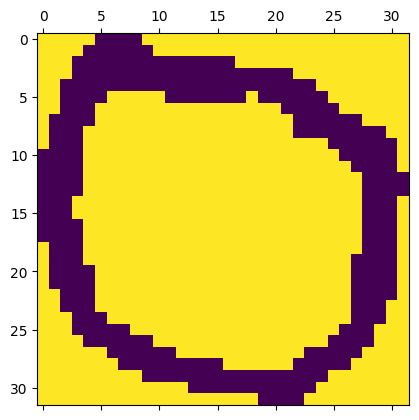

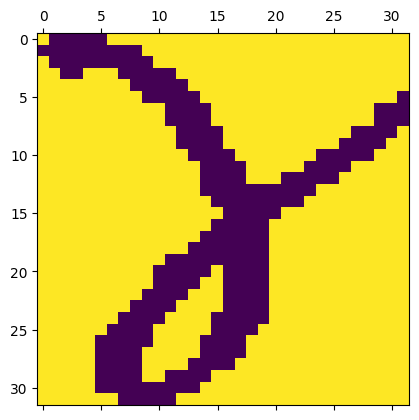

In [14]:
# predict 1st image
plt.matshow(X_val[0])
y_predicted = model.predict(x_test_scaled)
y_predicted[0]
print('Predicted Value is ',np.argmax(y_predicted[0]))
plt.matshow(X_val[76])
print('Predicted Value is ',np.argmax(y_predicted[76]))

In [15]:
# Normalize the data
X_train_scaled = X_train / 255.0
X_val_scaled= X_val / 255.0

# Created model with multiple layes to check the accuracy
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model2.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val))


Epoch 1/20
32/32 [==============================] - 1s 9ms/step - loss: 1.1000 - accuracy: 0.6350 - val_loss: 0.7025 - val_accuracy: 0.7416
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.3140 - accuracy: 0.8950 - val_loss: 0.3349 - val_accuracy: 0.9045
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.9270 - val_loss: 0.2940 - val_accuracy: 0.8933
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1898 - accuracy: 0.9330 - val_loss: 0.3285 - val_accuracy: 0.8933
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1169 - accuracy: 0.9600 - val_loss: 0.2482 - val_accuracy: 0.9326
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1095 - accuracy: 0.9620 - val_loss: 0.4559 - val_accuracy: 0.8989
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1178 - accuracy: 0.9640 - val_loss: 0.2274 - val_accuracy: 0.9438
Epoch 8/20
32/32 [==

In [16]:
# Evaluate the model on the test data
test_loss, test_acc = model2.evaluate(X_val_scaled, y_val)
print('Test accuracy:', test_acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.8708
Test accuracy: 0.8707864880561829


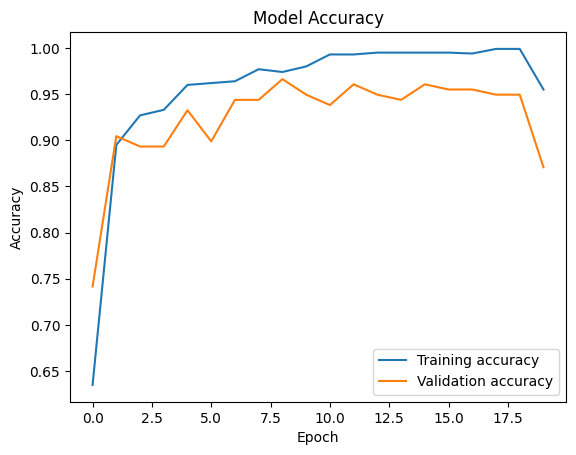

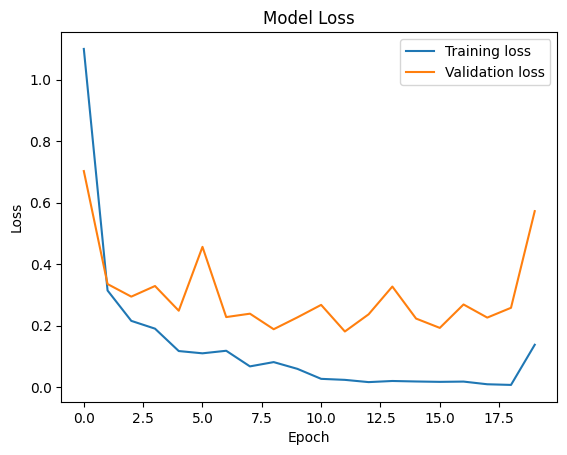

In [17]:

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Predicted Value is  7
Predicted Value is  9


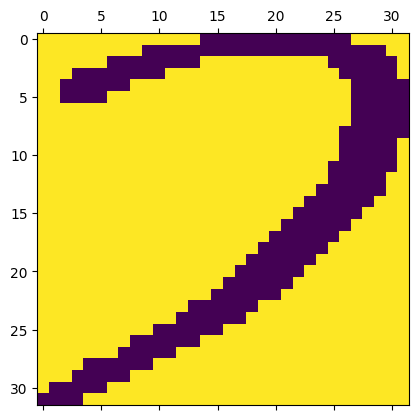

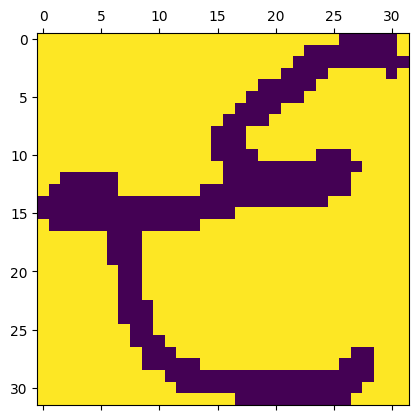

In [18]:
# predict 1st image
plt.matshow(X_val[130])
y_predicted = model2.predict(X_val_scaled)
y_predicted[130]
print('Predicted Value is ',np.argmax(y_predicted[130]))
plt.matshow(X_val[176])
print('Predicted Value is ',np.argmax(y_predicted[176]))